Importing dataset into dataframe


---



In [2]:
import nltk
import pandas as pd
dataset = pd.read_csv(r'/content/drive/MyDrive/NLP/NLP Project/mental_health.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#testing if .csv is imported and showing structure of dataset

print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB
None


,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [4]:
#2. Print column 'text'

print(dataset['text'])

0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried  year old girl subject domestic physic...
                               ...                        
27972    posting everyday people stop caring  religion ...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat do ...
Name: text, Length: 27977, dtype: object


In [5]:
# Check for any missing values in the dataset
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
text     0
label    0
dtype: int64



Label Distribution:
0    14139
1    13838
Name: label, dtype: int64


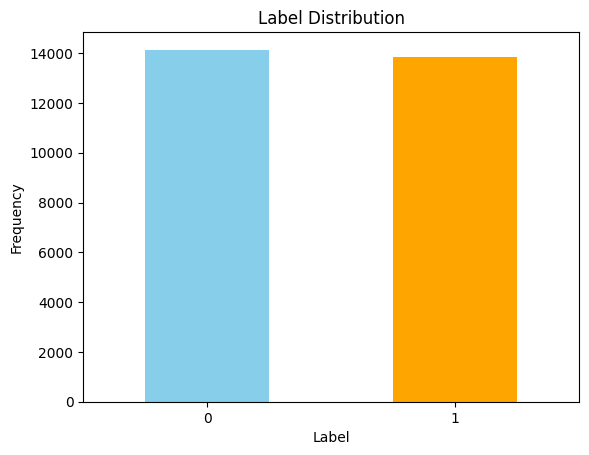

In [6]:
import matplotlib.pyplot as plt

# Explore the distribution of labels (0 or 1)
label_distribution = dataset['label'].value_counts()
print("\nLabel Distribution:")
print(label_distribution)

# Visualize label distribution using simple plot
label_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [7]:
#9. create a list of sentances

dataset_text = (dataset['text']).to_list()
print(dataset_text[:1000])

['dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math', 'nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself', 'music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs', 'im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upo

In [43]:
#10. join all sentances into one big text

raw_dataset_text = " ".join(dataset_text)
raw_dataset_text[:1000]

'dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost  take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upon enemy br

In [44]:
#now since we have raw text we want to have list of words from the previous test

words = raw_dataset_text.split(" ")
print(words[:300])

['dear', 'american', 'teens', 'question', 'dutch', 'person', 'heard', 'guys', 'get', 'way', 'easier', 'things', 'learn', 'age', 'us', 'sooooo', 'thth', 'graders', 'like', '', 'right', 'guys', 'learn', 'math', 'nothing', 'look', 'forward', 'lifei', 'dont', 'many', 'reasons', 'keep', 'going', 'feel', 'like', 'nothing', 'keeps', 'going', 'next', 'day', 'makes', 'want', 'hang', 'myself', 'music', 'recommendations', 'im', 'looking', 'expand', 'playlist', 'usual', 'genres', 'alt', 'pop', 'minnesota', 'hip', 'hop', 'steampunk', 'various', 'indie', 'genres', 'artists', 'people', 'like', 'cavetown', 'aliceband', 'bug', 'hunter', 'penelope', 'scott', 'various', 'rhymesayers', 'willing', 'explore', 'new', 'genresartists', 'such', 'anything', 'generic', 'rap', 'the', 'type', 'exclusively', 'sex', 'drugs', 'cool', 'rapper', 'is', 'rap', 'types', 'pretty', 'good', 'pop', 'popular', 'couple', 'years', 'ago', 'dunno', 'technical', 'genre', 'name', 'anyways', 'anyone', 'got', 'music', 'recommendations'

In [46]:
#print how many words are are in dataset and how many unique words are in dataset
print("Dataset has",len(words), "words.")
print("Dataset has", len(set(words)), "unique words.")

Dataset has 2043667 words.
Dataset has 72650 unique words.


In [47]:
#print FreqDist for this dataset
import nltk
freq = nltk.FreqDist(words)
print(type(freq))

print(freq.most_common(50))

<class 'nltk.probability.FreqDist'>
[('', 36054), ('im', 34720), ('like', 22300), ('want', 17299), ('know', 15475), ('feel', 14508), ('life', 14386), ('get', 13094), ('one', 12405), ('me', 12313), ('even', 11497), ('ive', 11287), ('people', 11249), ('would', 11001), ('time', 10829), ('cant', 10446), ('it', 10212), ('really', 10187), ('think', 8615), ('never', 8031), ('going', 7959), ('go', 7898), ('dont', 7829), ('much', 7546), ('friends', 7071), ('day', 6944), ('good', 6799), ('help', 6534), ('years', 6480), ('make', 5971), ('things', 5936), ('way', 5779), ('see', 5776), ('got', 5740), ('could', 5649), ('br', 5610), ('still', 5400), ('back', 5349), ('anything', 5304), ('someone', 5117), ('love', 5069), ('something', 4986), ('anymore', 4972), ('always', 4942), ('fucking', 4931), ('better', 4812), ('end', 4754), ('family', 4753), ('everything', 4745), ('school', 4713)]


In [48]:
import nltk
#function to remove stopwords in text and non alpha words and return them in lowercase
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

def remove_stopwords(text):

    word_tokens = word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')

    content = [w.lower() for w in word_tokens if w.lower() not in stopwords and w.isalpha()]
    return " ".join(content)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
#create new column in dataset without stopwords
dataset['without stopwords'] = [remove_stopwords(text) for text in dataset['text']]
print(dataset)

                                                    text  label  \
0      dear american teens question dutch person hear...      0   
1      nothing look forward lifei dont many reasons k...      1   
2      music recommendations im looking expand playli...      0   
3      im done trying feel betterthe reason im still ...      1   
4      worried  year old girl subject domestic physic...      1   
...                                                  ...    ...   
27972  posting everyday people stop caring  religion ...      0   
27973  okay definetly need hear guys opinion ive pret...      0   
27974  cant get dog think ill kill myselfthe last thi...      1   
27975  whats point princess bridei really think like ...      1   
27976  got nudes person might might know snapchat do ...      0   

                                       without stopwords  \
0      dear american teens question dutch person hear...   
1      nothing look forward lifei dont many reasons k...   
2      music re

In [50]:
dataset_text1 = (dataset['without stopwords']).to_list()
raw_dataset_text1 = " ".join(dataset_text1)
words1 = raw_dataset_text1.split(" ")
#print how many words are are in dataset and how many unique words are in dataset
print("Dataset has",len(words1), "words after removing stopwords. ")
print("Dataset has", len(set(words1)), "unique words after removing stopwords. ")

Dataset has 1909647 words after removing stopwords. 
Dataset has 72092 unique words after removing stopwords. 


In [51]:
import re
from nltk.tokenize import word_tokenize

def regexi(text):
    # Tokenize the input text
    tokenized_text = word_tokenize(text)

    # List to hold cleaned words
    cleaned_words = []

    for word in tokenized_text:

        cleaned_word = re.sub(r'[^a-zA-Z\s]', '', word) #remove special characters and punctations

        cleaned_word = cleaned_word.lower()  # Convert to lowercase

        # Enhanced regex pattern to remove specific words (i, ve, br, m)
        cleaned_word = re.sub(r'\b(?:i|ve|br|m|I|re|s)\b', '', cleaned_word)

        # Add the cleaned word to the list
        cleaned_words.append(cleaned_word)

    # Join the processed words back into a string
    return ' '.join(cleaned_words)

# Example usage
text = "I've been to the market, but I'm not sure if I can br it."
cleaned_text = regexi(text)
print(cleaned_text)

  been to the market  but   not sure if  can  it 


In [52]:
#Applying the function to a new dataset column regex
dataset['apply regexes'] = [regexi(text) for text in dataset['without stopwords']]
print(dataset)

                                                    text  label  \
0      dear american teens question dutch person hear...      0   
1      nothing look forward lifei dont many reasons k...      1   
2      music recommendations im looking expand playli...      0   
3      im done trying feel betterthe reason im still ...      1   
4      worried  year old girl subject domestic physic...      1   
...                                                  ...    ...   
27972  posting everyday people stop caring  religion ...      0   
27973  okay definetly need hear guys opinion ive pret...      0   
27974  cant get dog think ill kill myselfthe last thi...      1   
27975  whats point princess bridei really think like ...      1   
27976  got nudes person might might know snapchat do ...      0   

                                       without stopwords  \
0      dear american teens question dutch person hear...   
1      nothing look forward lifei dont many reasons k...   
2      music re

In [53]:
dataset_text2 = (dataset['apply regexes']).to_list()
raw_dataset_text2 = " ".join(dataset_text2)
words2 = raw_dataset_text2.split(" ")
#print how many words are are in dataset and how many unique words are in dataset
print("Dataset has",len(words2), "words after applying regexes.")
print("Dataset has", len(set(words2)), "unique words after applying regexes.")

Dataset has 1909647 words after applying regexes.
Dataset has 72091 unique words after applying regexes.


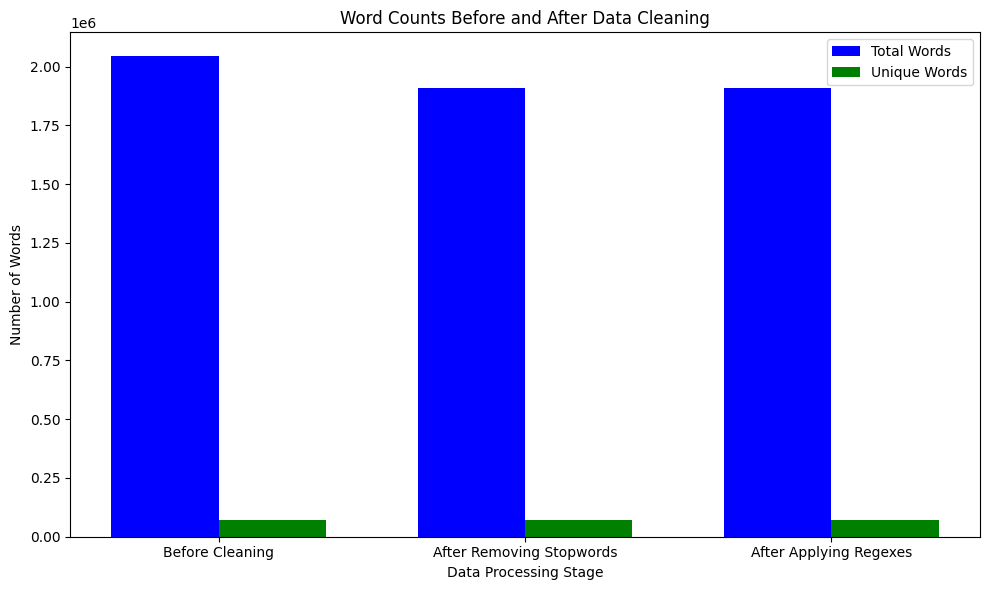

In [54]:
import matplotlib.pyplot as plt
import numpy as np


total_words_before_cleaning = len(words)
unique_words_before_cleaning = len(set(words))

total_words_after_stopwords = len(words1)
unique_words_after_stopwords = len(set(words1))

total_words_after_regex = len(words2)
unique_words_after_regex =len(set(words2))
# Data preparation for plotting
categories = ['Before Cleaning', 'After Removing Stopwords', 'After Applying Regexes']
total_words_data = [total_words_before_cleaning, total_words_after_stopwords, total_words_after_regex]
unique_words_data = [unique_words_before_cleaning, unique_words_after_stopwords, unique_words_after_regex]

# Creating bar width
bar_width = 0.35
index = np.arange(len(categories))

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(index, total_words_data, bar_width, label='Total Words', color='b')
plt.bar(index + bar_width, unique_words_data, bar_width, label='Unique Words', color='g')

# Adding labels and title
plt.xlabel('Data Processing Stage')
plt.ylabel('Number of Words')
plt.title('Word Counts Before and After Data Cleaning')
plt.xticks(index + bar_width / 2, categories)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


In [55]:
nltk.download('wordnet')
lemma = nltk.WordNetLemmatizer()
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

print(porter.stem('music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs'))
print(lancaster.stem('music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs'))
print(lemma.lemmatize("music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs"))

#the best output using spacy
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    # Process the text using SpaCy
    doc = nlp(text)

    # Extract the lemma for each token and filter out punctuation
    lemmatized_text = [token.lemma_ for token in doc if not token.is_punct]

    return " ".join(lemmatized_text)

# Example usage
text = "music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs"
lemmatized_text = lemmatize_text(text)
print(lemmatized_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssong
music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs
music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk v

In [56]:
#12. Apply Lemmatization on all texts - rows in dataset

dataset['v1: final text'] = [lemmatize_text(text) for text in dataset['apply regexes']]
dataset

,text,label,without stopwords,apply regexes,v1: final text
0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...,dear american teens question dutch person hear...,dear american teen question dutch person hear ...
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...,nothing look forward lifei dont many reasons k...,nothing look forward lifei do not many reason ...
2,music recommendations im looking expand playli...,0,music recommendations im looking expand playli...,music recommendations im looking expand playli...,music recommendation I m look expand playlist ...
3,im done trying feel betterthe reason im still ...,1,im done trying feel betterthe reason im still ...,im done trying feel betterthe reason im still ...,I m do try feel betterthe reason I m still ali...
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...,worried year old girl subject domestic physica...,worry year old girl subject domestic physicalm...
...,...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,posting everyday people stop caring religion m...,posting everyday people stop caring religion m...,post everyday people stop care religion matter...
27973,okay definetly need hear guys opinion ive pret...,0,okay definetly need hear guys opinion ive pret...,okay definetly need hear guys opinion ive pret...,okay definetly need hear guy opinion I ve pret...
27974,cant get dog think ill kill myselfthe last thi...,1,cant get dog think ill kill myselfthe last thi...,cant get dog think ill kill myselfthe last thi...,can not get dog think ill kill myselfthe last ...
27975,whats point princess bridei really think like ...,1,whats point princess bridei really think like ...,whats point princess bridei really think like ...,what s point princess bridei really think like...


In [57]:
proba = (dataset['v1: final text']).to_list()
raw_dataset_proba = "".join(proba)
raw_dataset_proba[:10000]

'dear american teen question dutch person hear guy get way easy thing learn age we sooooo thth grader like right guy learn mathnothing look forward lifei do not many reason keep go feel like nothing keep go next day make want hangmusic recommendation I m look expand playlist usual genre alt pop minnesota hip hop steampunk various indie genre artist people like cavetown aliceband bug hunter penelope scott various rhymesayer willing explore new genresartist anything generic rap type exclusively sex drug cool rapper rap type pretty good pop popular couple year ago dunno technical genre name anyways anyone get music recommendation favorite artistssongI m do try feel betterthe reason I m still alive know mum devastate ever kill ever pass I m still state I m go hesitate end life shortly I m almost take med go therapy nothing seem help enough do not want around anymore hate feeling like would not wish upon enemy brain feel like constantly like static tv will not shut overthinke think I m run 

In [58]:
dataset['cleaned_text'] = [regexi(text) for text in dataset['v1: final text']]
print(dataset)

                                                    text  label  \
0      dear american teens question dutch person hear...      0   
1      nothing look forward lifei dont many reasons k...      1   
2      music recommendations im looking expand playli...      0   
3      im done trying feel betterthe reason im still ...      1   
4      worried  year old girl subject domestic physic...      1   
...                                                  ...    ...   
27972  posting everyday people stop caring  religion ...      0   
27973  okay definetly need hear guys opinion ive pret...      0   
27974  cant get dog think ill kill myselfthe last thi...      1   
27975  whats point princess bridei really think like ...      1   
27976  got nudes person might might know snapchat do ...      0   

                                       without stopwords  \
0      dear american teens question dutch person hear...   
1      nothing look forward lifei dont many reasons k...   
2      music re

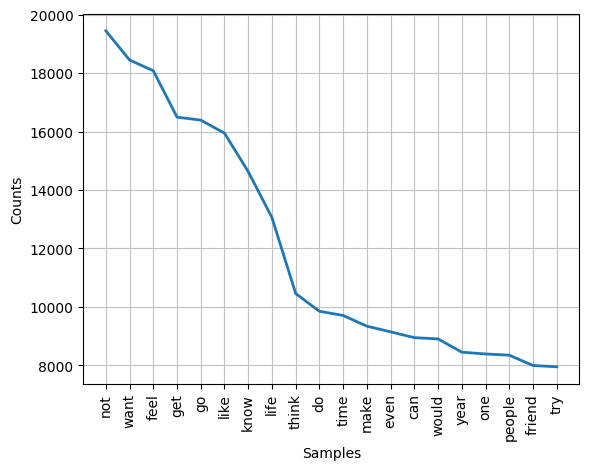

<Axes: xlabel='Samples', ylabel='Counts'>

In [59]:
# Get data about most used words in class 1

all_texts_1 = []

for text in dataset[dataset['label']==1]['cleaned_text']:
  for word in nltk.word_tokenize(text):
    all_texts_1.append(word)

nltk.FreqDist(all_texts_1).plot(20)

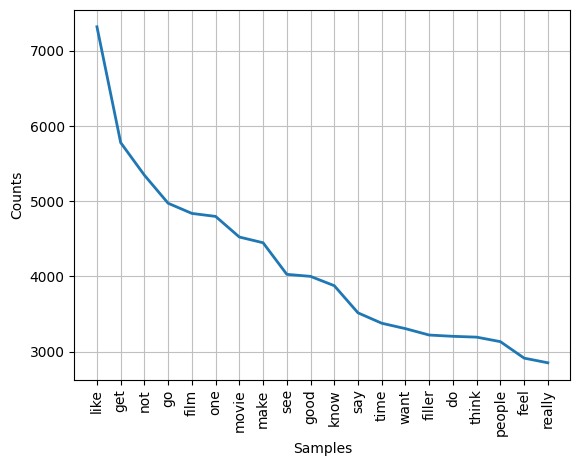

<Axes: xlabel='Samples', ylabel='Counts'>

In [60]:
# Get data about most used words in class 0

all_texts_0 = []

for text in dataset[dataset['label']==0]['cleaned_text']:
  for word in nltk.word_tokenize(text):
    all_texts_0.append(word)

nltk.FreqDist(all_texts_0).plot(20)

In [61]:
print(nltk.FreqDist(all_texts_1).most_common())

[('not', 19447), ('want', 18448), ('feel', 18081), ('get', 16493), ('go', 16392), ('like', 15946), ('know', 14629), ('life', 13057), ('think', 10460), ('do', 9852), ('time', 9709), ('make', 9342), ('even', 9149), ('can', 8950), ('would', 8907), ('year', 8453), ('one', 8392), ('people', 8350), ('friend', 7997), ('try', 7953), ('thing', 7664), ('really', 7335), ('day', 6863), ('tell', 6452), ('never', 6419), ('well', 6379), ('live', 6333), ('say', 6274), ('help', 6127), ('take', 5781), ('much', 5693), ('good', 5563), ('end', 5434), ('bad', 5263), ('kill', 5232), ('die', 5186), ('see', 5176), ('work', 5156), ('talk', 4988), ('way', 4770), ('love', 4746), ('could', 4716), ('anymore', 4655), ('need', 4414), ('anything', 4292), ('family', 4177), ('everything', 4099), ('back', 4058), ('someone', 3980), ('still', 3930), ('keep', 3926), ('nothing', 3920), ('always', 3907), ('find', 3791), ('hate', 3782), ('redflag', 3768), ('care', 3767), ('fucking', 3758), ('start', 3712), ('every', 3699), ('l

In [62]:
print(nltk.FreqDist(all_texts_0).most_common())


[('like', 7319), ('get', 5779), ('not', 5346), ('go', 4973), ('film', 4838), ('one', 4798), ('movie', 4524), ('make', 4448), ('see', 4028), ('good', 4001), ('know', 3877), ('say', 3516), ('time', 3378), ('want', 3306), ('filler', 3221), ('do', 3204), ('think', 3193), ('people', 3133), ('feel', 2914), ('really', 2852), ('well', 2828), ('would', 2693), ('day', 2647), ('friend', 2577), ('even', 2351), ('love', 2160), ('thing', 2134), ('year', 2103), ('also', 2077), ('take', 1944), ('life', 1859), ('much', 1853), ('look', 1841), ('tell', 1827), ('talk', 1806), ('guy', 1780), ('give', 1775), ('come', 1729), ('play', 1712), ('great', 1705), ('first', 1700), ('girl', 1694), ('find', 1659), ('watch', 1643), ('story', 1642), ('never', 1613), ('way', 1575), ('school', 1567), ('need', 1543), ('try', 1529), ('can', 1515), ('something', 1515), ('could', 1488), ('help', 1485), ('character', 1479), ('still', 1476), ('show', 1437), ('bad', 1419), ('post', 1400), ('work', 1380), ('start', 1376), ('back

In [63]:
#Take the features - 'cleaned_text' column as X variable and class - 'label' column as Y variable

X = dataset['cleaned_text']
y = dataset['label']

print(X)
print(y)

0        dear american teen question dutch person hear ...
1        nothing look forward lifei do not many reason ...
2        music recommendation   look expand playlist us...
3          do try feel betterthe reason   still alive k...
4        worry year old girl subject domestic physicalm...
                               ...                        
27972    post everyday people stop care religion matter...
27973    okay definetly need hear guy opinion   pretty ...
27974    can not get dog think ill kill myselfthe last ...
27975    what  point princess bridei really think like ...
27976    get nude person might might know snapchat ok c...
Name: cleaned_text, Length: 27977, dtype: object
0        0
1        1
2        0
3        1
4        1
        ..
27972    0
27973    0
27974    1
27975    1
27976    0
Name: label, Length: 27977, dtype: int64


In [64]:
# Now we need to transform text features into numberic values such that we will count occurance of each word in whole dataset for each row

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

tf = CountVectorizer()
x_tf = tf.fit_transform(X)

#  created dataframe just for visualization purposes, to show how our dataset looks now it has no value to the prediction

new_dataset = pd.DataFrame(x_tf.toarray(), columns=tf.get_feature_names_out())
new_dataset

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaaaaa,aaaaaaaaaaaaaa,...,zuess,zula,zulaaynurmzeyyan,zulu,zurer,zuzzzuzz,zyprexa,zzuckerberg,zzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Import library from sklearn to divide dataset into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_tf, y, test_size = 0.3, stratify = y)

In [66]:
# Import RandomForestClassifier from sklearn library and train model with train sets

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
#Evaluate the accuracy of the model with test datasets

model.score(X_test, y_test)

0.8862282582797236

In [68]:
#With Confusion Matrix visualize the predicted values, which are predicted correct which not

from sklearn.metrics import multilabel_confusion_matrix

y_pred = model.predict(X_test)
cf_matrix = multilabel_confusion_matrix(y_test, y_pred, labels=[0,1])
print(cf_matrix)

[[[3726  426]
  [ 529 3713]]

 [[3713  529]
  [ 426 3726]]]


<Axes: >

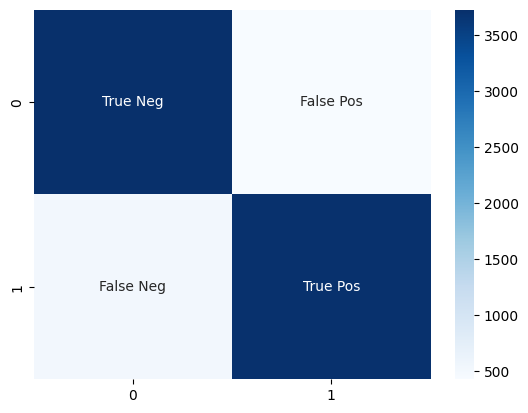

In [69]:
import seaborn as sns
import numpy as np

#Confusion Matrix for first class

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[0], annot=labels, fmt='', cmap='Blues')

<Axes: >

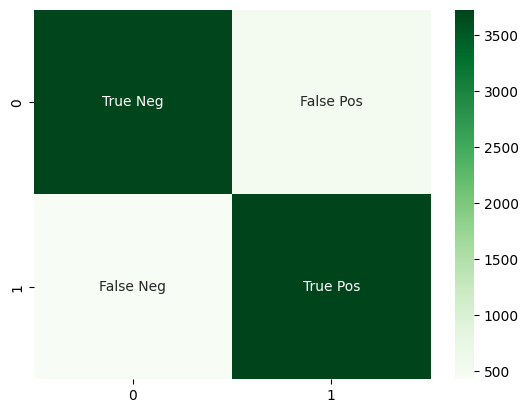

In [70]:
#Confusion Matrix for second class

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[1], annot=labels, fmt='', cmap='Greens')

In [71]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the Naive Bayes classifier
nb_model = MultinomialNB()

In [72]:
# Train the model with the training data
nb_model.fit(X_train, y_train)

MultinomialNB()

In [73]:
# Evaluate the accuracy of the model with the test data
nb_accuracy = nb_model.score(X_test, y_test)
print(f"Naive Bayes Model Accuracy: {nb_accuracy}")

Naive Bayes Model Accuracy: 0.8454848701453419


In [74]:
# Predict the test dataset
y_pred_nb = nb_model.predict(X_test)

# Generate the confusion matrix for the Naive Bayes predictions
cf_matrix_nb = multilabel_confusion_matrix(y_test, y_pred_nb, labels=[0, 1])
print(cf_matrix_nb)


[[[4058   94]
  [1203 3039]]

 [[3039 1203]
  [  94 4058]]]


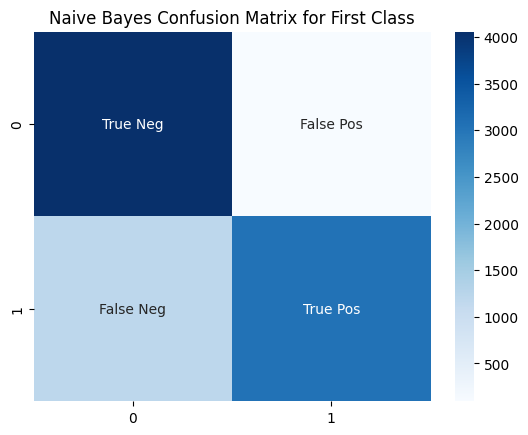

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of Confusion Matrix for the first class
sns.heatmap(cf_matrix_nb[0], annot=labels, fmt='', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix for First Class')
plt.show()

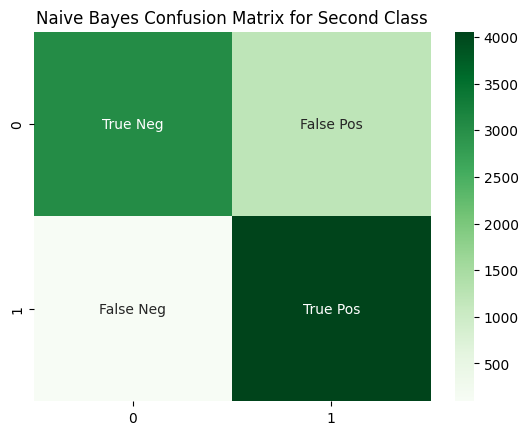

In [76]:
# Visualization of Confusion Matrix for the second class
sns.heatmap(cf_matrix_nb[1], annot=labels, fmt='', cmap='Greens')
plt.title('Naive Bayes Confusion Matrix for Second Class')
plt.show()

In [80]:
# Function to preprocess user input text
def preprocess_text(text):

    cleaned_text = regexi(text)
    text_features = tf.transform([cleaned_text])  # Vectorize text
    return text_features

# Function to predict mental health status
def predict_mental_health(text):
    text_features = preprocess_text(text)
    prediction = model.predict(text_features)
    return prediction[0]

# User input
user_input = input("Enter text for mental health prediction: ")

# Predict and print the result
prediction_result = predict_mental_health(user_input)
if prediction_result == 1:
    print("The text indicates potential mental health concerns.")
else:
    print("No mental health concerns detected in the text.")

Enter text for mental health prediction: I want to kill myself.
The text indicates potential mental health concerns.


In [78]:
# Function to preprocess user input text
def preprocess_text(text):

    cleaned_text = regexi(text)
    text_features = tf.transform([cleaned_text])  # Vectorize text
    return text_features

# Function to predict mental health status
def predict_mental_health(text):
    text_features = preprocess_text(text)
    prediction = model.predict(text_features)
    return prediction[0]

# User input
user_input = input("Enter text for mental health prediction: ")

# Predict and print the result
prediction_result = predict_mental_health(user_input)
if prediction_result == 1:
    print("The text indicates potential mental health concerns.")
else:
    print("No mental health concerns detected in the text.")

Enter text for mental health prediction: I had a great day full of positive experiences and productive activities.
No mental health concerns detected in the text.
